In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files


# uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
# import pandas as pd
# import io

# df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling (2).csv']))

df = pd.read_csv('Datasets/Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [12]:
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype('int')

In [13]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X = df[['CreditScore', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df[['Exited']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((8000, 11), (8000, 1)), ((2000, 11), (2000, 1)))

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import regularizers

In [20]:
classifier=Sequential([
    Dense(units=16,kernel_initializer='he_uniform',activation='relu',input_dim=11, kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(units=8,kernel_initializer='he_uniform',activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(units=8,kernel_initializer='he_uniform',activation='relu'),
    Dropout(0.2),
    Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid')
])

In [21]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505 (1.97 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 48 (192.00 B)

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4477 - loss: 1.5871 - val_accuracy: 0.7857 - val_loss: 0.8744
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7684 - loss: 0.8640 - val_accuracy: 0.7936 - val_loss: 0.7279
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7878 - loss: 0.7311 - val_accuracy: 0.7936 - val_loss: 0.6287
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7989 - loss: 0.6368 - val_accuracy: 0.7940 - val_loss: 0.5546
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.5642 - val_accuracy: 0.7967 - val_loss: 0.5039
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8093 - loss: 0.5119 - val_accuracy: 0.8183 - val_loss: 0.4550
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.4665 - val_accuracy: 0.8391 - val_loss: 0.4239
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8252 - loss: 0.4469 - val_accuracy: 0.

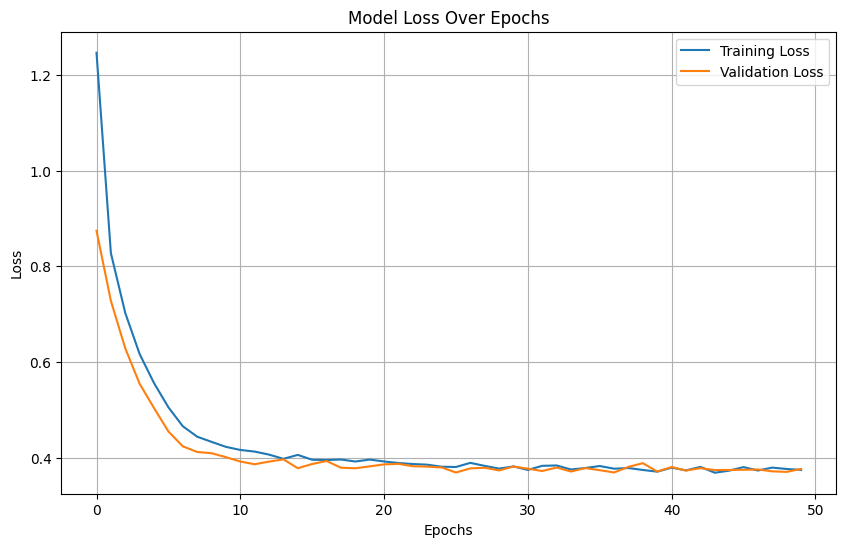

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

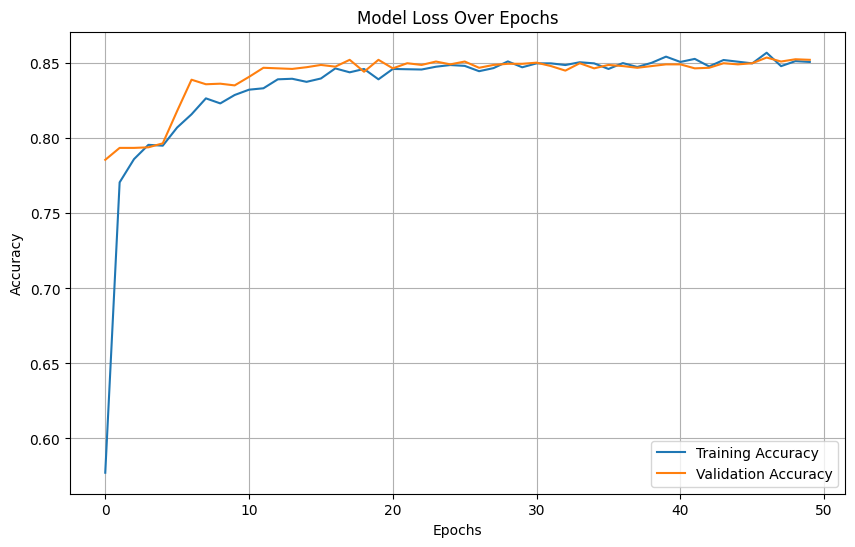

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8545

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1550   57]
 [ 234  159]]
